# Sequence-to-Seqeunce
* Sequence-to-sequence(Seq2Seq)는 입력된 시퀀스로부터 다른 도메인의 시퀀스를 출력하는 모델
* 대표적인 응용분야
  - **기계번역 (machine translation)**
    - '한국어 도메인' 을 가지는 문장을 입력하면 '영어 도메인' 에 해당하는 문장을 얻을수 있다.
    - 구글 번역기, 파파고...
  - **내용 요약 (Text Summarization)** : 상대적으로 큰 원문의 핵심 내용만 간추려서 상대적으로 작은 요약문으로 변환하는 것
  - **음성 인식 (Speech to Text,STT)** : 음성을 글자로 변환하는 기술

In [1]:
# seq2seq 는 새로운 모델이 아니라 RNN 을 2개 조합해서 만들수 있다.

## 인코더 & 디코더

* Seq2Seq는 다른 특별한 기술을 이용하는 것이 아니라, 지금까지 배운 RNN(순환신경망) 기술들을 조합해 만들며, 일반적으로 **encoder**와 **decoder**로 구성
<br>

![](https://wikidocs.net/images/page/24996/%EC%8B%9C%ED%80%80%EC%8A%A4%ED%88%AC%EC%8B%9C%ED%80%80%EC%8A%A4.PNG)

![](https://wikidocs.net/images/page/24996/seq2seq%EB%AA%A8%EB%8D%B811.PNG)

- Seq2Seq 는 '인코더' 와 '디코더' 라는 모듈로 구성됨.
- **인코더**
  - 입력문장의 모든 단어들을 순차적으로 입력 받은뒤
  - 마지막에 이 모든 단어 정보들을 압축하여 하나의 벡터를 만든다. 이를 **컨텍스트 벡터(context vector)** 라 함
  - 이 컨텍스트 벡터가 디코더에 전송된다.
- **디코더**
  - 컨텍스트 벡터 를 받아서 번역된 단어를 한개씩 순차적으로 출력.



* **Context Vector**

![](https://wikidocs.net/images/page/24996/%EC%BB%A8%ED%85%8D%EC%8A%A4%ED%8A%B8_%EB%B2%A1%ED%84%B0.PNG)

위의 그림에서는 컨텍스트 벡터를 4의 사이즈로 표현하였지만,
실제 현업에서 사용되는 seq2seq 모델에서는 보통 수백 이상의 차원을 갖고있습니다

## 인코더와 디코더의 아키텍쳐

![](https://wikidocs.net/images/page/24996/%EC%9D%B8%EC%BD%94%EB%8D%94%EB%94%94%EC%BD%94%EB%8D%94%EB%AA%A8%EB%8D%B8.PNG)

- 인코더와 디코더라 불리우는 두개의 RNN 아키텍처로 구성
  - 인코더 : 입력문장을 입력받는 RNN셀
  - 디코더 : 출력문장을 출력하는 RNN셀
  - 일반적으로 바닐라RNN 보다는 **LSTM** 이나 **GRU** 로 구성함 (성능때문에!)

- Seq2Seq 는 **'훈련과정'** 과 **'예측(테스트)과정'** 의 작동방식이 조금 다릅니다.    

### '훈련과정'의 아키텍쳐
- 인코더에는 **입력 단어**들이 입력 하여 컨텍스트 벡터 출력
- 디코더에게 인코더가 보낸 '컨텍스트 벡터'와 **실제 정답**인 &lt;sos&gt; je suis étudiant를 입력 받았을 때,
je suis étudiant &lt;eos&gt;가 나와야 된다고 **'정답'을 알려주면서 훈련**합니다.

- 즉, 훈련과정에는 위의 **3가지 데이터**가 필요하다!

- 이에 대해서는 뒤에 **교사 강요(teacher forcing)** 라는것을 설명하면서 재언급하겠습니다.

### '예측(테스트) 과정' 의 아키텍쳐
- 인코더
  - 입력문장은 단어 토큰화 되어 쪼개어 지고
  - 단어토큰 각각은 RNN셀의 각 타임스텝의 입력이 된다.
  - 인코더 RNN셀은 모든 단어를 입력받은 뒤에,
  - 인코더의 마지막 타임스텝 의 은닉상태(hidden state) 를 디코더로 넘겨진다 (이게 바로 context vector 다)
  - 이 context vector 는 디코더 RNN셀의 첫번째 은닉상태에 사용된다.

- 디코더
  - 우선 디코더는 초기 입력으로 문장의 시작을 의미하는 토큰
  &lt;sos&gt; 가 들어감
  - 디코더는 &lt;sos&gt; 가 입력되면 다음에 등장할 확률이 높은 단어를 예측.
  - 위 그림에서 첫번째 타입스텝의 디코더 RNN셀은 다음에 등장할 단어로 "je"를 예측했다.
  - 그렇게 예측한 단어 je 를 다음 타임스텝의 RNN 셀 입력으로 입력
  - .. 다음에는 "suis", 다음에는 "etudiant"..
  - 이런식으로 디코더는 **타임스텝을 거듭 반복**하면서 다음의 단어들을 예측해낸다.  언제까지?
  - 이 반복행위는 문장의 끝을 의미하는 토큰 &lt;eos&gt; 가 다음단어로 예측될때까지 반복됨.

## word embedding
- 아래 그림에서 입,출력에 쓰이는 단어토큰 부분 주목
![](https://wikidocs.net/images/page/24996/%EB%8B%A8%EC%96%B4%ED%86%A0%ED%81%B0%EB%93%A4%EC%9D%B4.PNG)

- seq2seq 에 사용되는 모든 단어들은 임베딩 벡터로 변환후 입력으로 사용됨.

![](https://wikidocs.net/images/page/24996/%EC%9E%84%EB%B2%A0%EB%94%A9%EB%B2%A1%ED%84%B0.PNG)

하나의 RNN셀은 각각의 timestep 마다 두개의 입력을 받는다

![](https://wikidocs.net/images/page/24996/rnn%EA%B7%BC%ED%99%A9.PNG)

## softmax

![](https://wikidocs.net/images/page/24996/decodernextwordprediction.PNG)
- 각 타임스텝의 출력 단어로 나올수 있는 단어는 '다양'하다
- 이를 예측하기 위해 softmax 함수 사용됨

# 기계 번역 (Machine Translation)

## 문자 레벨 기계번역
Character-Level Neural Machine Translation

In [2]:
# 기계번역기를 훈련시키기 위한 말뭉치는 병렬 코퍼스 (parallel corpus) 필요

In [3]:
# 다운로드 링크 : http://www.manythings.org/anki

# 이번 실습에서는 프랑스-영어 병렬 코퍼스인 fra-eng.zip 파일을 사용.
# 해당 파일의 압축을 풀면 -> fra.txt라는 파일
# 이 파일이 이번 실습에서 사용할 파일입니다.

## 병렬 corpus 데이터

기계번역기를 훈련시키기 위해서는 훈련데이터를 병렬 코퍼스 (parrel corpus) 형태로 구성된 데이터가 필요하다.

- 출처: http://www.manythings.org/anki


  - **fra.txt http://www.manythings.org/anki/fra.txt**

- 예를 들면

|src|tar|
|---|---|
|Watch me|Regradez-moi|
|Go.|Marche.|

* 일반적인 자연어 처리의 경우, 입력 시퀀스와 출력 시퀀스의 길이가 동일함
* 그러나! Seq2Seq는 입력 시퀀스와 출력 시퀀스의 길이가 다를 수 있다고 가정
* Seq2Seq에는 다음의 데이터들이 필요하다
  - 인코더의 입력에 헤당하는 데이터
  - 디코더의 입력에 해당하는 데이터
  - 디코더의 출력과 비교할 목표 데이터 구성



## 기본 import

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import tensorflow as tf
from tensorflow import keras

import random
def set_seed(seed = 42):
  tf.keras.utils.set_random_seed(seed)
  tf.config.experimental.enable_op_determinism()

set_seed(42)

from tensorflow.keras import preprocessing
from sklearn.model_selection import train_test_split

from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model

In [5]:
base_path = r'/content/drive/MyDrive/KoreaIT (코리아it)/250715 💚자연어처리S4/[자연어처리]/dataset(NLP2507)'

In [6]:
df = pd.read_csv(os.path.join(base_path, 'fra.txt'), names=['src', 'tar', 'lic'], sep='\t')
df.head()

,src,tar,lic
0,Go.,Va !,CC-BY 2.0 (France) Attribution: tatoeba.org #2...
1,Go.,Marche.,CC-BY 2.0 (France) Attribution: tatoeba.org #2...
2,Go.,En route !,CC-BY 2.0 (France) Attribution: tatoeba.org #2...
3,Go.,Bouge !,CC-BY 2.0 (France) Attribution: tatoeba.org #2...
4,Hi.,Salut !,CC-BY 2.0 (France) Attribution: tatoeba.org #5...


In [7]:
df.shape

(232736, 3)

## 전처리

In [8]:
# 불필요한 컬럼 제거
del df['lic']

df.head()

,src,tar
0,Go.,Va !
1,Go.,Marche.
2,Go.,En route !
3,Go.,Bouge !
4,Hi.,Salut !


*   데이터를 모두 사용할 경우 많은 시간이 소요되기 때문에, 일부 데이터만 사용
  * 게다가 Colab 에선 메모리 부족으로 학습 못하기도 함
*   목표 데이터에는 시작과 끝을 나타내는 토큰이 포함되어야 함
  *   여기서는 '\t'와 '\n'을 각각 시작과 끝을 나타내는 토큰으로 사용

In [9]:
# 위 원본 데이터에서 60000의 샘플만 가지고 기계 번역기 구축해보다.

df = df[0:60000]

df.shape

(60000, 2)

In [10]:
# 현재 데이터 어떤 구성인지 무작위 샘플 확인
df.sample(10)  # 무작위로 10개 행

,src,tar
12628,Please try one.,Essayez-en un.
37730,We have to be firm.,Nous devons être fermes.
39991,Give Tom some water.,Donne de l'eau à Tom.
8525,I've got eyes.,Je suis pourvu d'yeux.
8279,I'll get this.,Je vais prendre ceci.
51012,"Let's go by taxi, OK?","Allons-y en taxi, d'accord ?"
14871,Girls are crazy.,Les filles sont folles.
15127,Here's your key.,C'est ta clef.
9366,They're alive.,Ils sont en vie.
33322,I admire your work.,J'admire votre travail.


In [11]:
# target 인 프랑스어 데이터에는 문장시작 토큰 <sos> 와  문장종료 토큰 <eos> 를 추가해주자
# 이번예제에선
#  <sos> => '\t'
#  <eos> => '\n'

In [12]:
df.tar = df.tar.apply(lambda x: '\t ' + x + ' \n')  # 띄어쓰기 주의

df.sample(10)

,src,tar
30014,Tom gave me money.,\t Tom me donna de l'argent. \n
20704,I gave it a shot.,\t J'ai tenté le coup. \n
39358,"Can I have one, too?",\t Puis-je en avoir un également ? \n
59901,Roll your window down.,\t Baissez votre vitre. \n
34204,I said he could go.,\t J'ai dit qu'il pouvait partir. \n
33490,I couldn't help it.,\t Je ne pouvais pas m'en empêcher. \n
47212,Do you have the keys?,\t Avez-vous les clés ? \n
42902,Let's go right away.,\t Partons tout de suite. \n
35485,Keep your promises.,\t Tiens tes promesses. \n
56263,He is a man of wisdom.,\t C'est un homme sage. \n


## 글자사전, 인덱스 구성

In [13]:
# 문자 레벨의 기계번약이라
# 단어가 아닌 문자가 토큰의 단위가 될것이다.

*   이번 예제에서는 **글자 단위**로 예측 하기 위해서, 글자 집합을 구축해주어야 함
*   구축한 다음, 정렬해 인덱스를 부여해 '글자'에 해당하는 **사전**을 만듬
*   **사전**은 '글자'를 모델에 투입하도록 변환하거나 예측시 반환되는 인덱스들을 '글자'로 변환할 때 사용



In [14]:
# src 와 tar 에 대한 글자사전을 만들어 줄거다

# 문자 집합 (사전) 구축
src_vocab = set()
for sentence in df.src: # src 1줄씩 읽음
  for char in sentence: # 1개의 문자씩 읽음
    src_vocab.add(char)


tar_vocab = set()
for sentence in df.tar:
  for char in sentence:
    tar_vocab.add(char)

print(src_vocab)
print(tar_vocab)

{'m', 't', 'l', 'T', 'k', '7', 'B', 'f', 'N', '9', '5', 'X', '!', 'V', 'O', 'q', ',', 's', 'p', '-', 'x', 'y', 'C', '2', 'w', 'é', 'd', '1', 'D', '8', '/', 'A', '?', 'W', 'b', '"', '%', 'Y', '&', 'E', 'U', 'c', 'ï', 'g', 'S', 'o', 'M', 'e', ':', 'H', 'R', 'Q', '0', '’', "'", '$', '.', '€', '3', 'G', ' ', 'v', '6', 'n', 'P', 'r', 'K', 'I', 'h', 'a', 'L', '4', 'j', 'u', 'F', 'i', 'J', 'z', 'Z'}
{'m', 'À', 't', 'l', 'T', 'k', '7', 'B', 'f', 'N', '‘', '9', '5', 'X', 'Ô', '!', '\u202f', 'V', 'O', 'q', ',', 's', '‽', 'p', 'Ç', '-', 'x', 'ô', 'y', 'Ê', 'É', 'C', '2', 'w', '«', 'é', 'd', '1', 'D', 'ë', 'ù', '8', 'A', '?', 'W', 'ê', 'b', '\u2009', '"', 'à', '%', '\xa0', 'â', 'Y', '&', 'E', 'U', 'î', '»', 'c', 'ï', 'œ', 'g', '\t', 'û', 'S', 'o', 'M', 'e', ':', 'H', 'R', 'Q', '’', '0', "'", '$', '.', 'è', '3', 'G', ' ', 'v', '6', 'n', 'P', 'r', 'K', 'I', 'h', 'a', 'L', '4', 'ç', 'j', 'u', 'F', 'i', 'J', '\n', 'z'}


In [15]:
# 문자 집합의 크기 확인  (사전 크기)
src_vocab_size = len(src_vocab) + 1
tar_vocab_size = len(tar_vocab) + 1

print('src 문장의 char 집합:', src_vocab_size)
print('tar 문장의 char 집합:', tar_vocab_size)

src 문장의 char 집합: 80
tar 문장의 char 집합: 102


In [16]:
# 영어와 프랑스어 각각 80개, 102개의 문자가 존재.

In [17]:
# 사전 정렬
src_vocab = sorted(list(src_vocab))
tar_vocab = sorted(list(tar_vocab))

print(src_vocab)
print(tar_vocab)

[' ', '!', '"', '$', '%', '&', "'", ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'é', 'ï', '’', '€']
['\t', '\n', ' ', '!', '"', '$', '%', '&', "'", ',', '-', '.', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '\xa0', '«', '»', 'À', 'Ç', 'É', 'Ê', 'Ô', 'à', 'â', 'ç', 'è', 'é', 'ê', 'ë', 'î', 'ï', 'ô', 'ù', 'û', 'œ', '\u2009', '‘', '’', '\u202f', '‽']


In [18]:
# 각 문자에 정수 인덱스 부여를 할거다.

# word to index 구성
src_to_index = dict([(word, i + 1) for i, word in enumerate(src_vocab)])
tar_to_index = dict([(word, i + 1) for i, word in enumerate(tar_vocab)])

print(src_to_index)
print(tar_to_index)


{' ': 1, '!': 2, '"': 3, '$': 4, '%': 5, '&': 6, "'": 7, ',': 8, '-': 9, '.': 10, '/': 11, '0': 12, '1': 13, '2': 14, '3': 15, '4': 16, '5': 17, '6': 18, '7': 19, '8': 20, '9': 21, ':': 22, '?': 23, 'A': 24, 'B': 25, 'C': 26, 'D': 27, 'E': 28, 'F': 29, 'G': 30, 'H': 31, 'I': 32, 'J': 33, 'K': 34, 'L': 35, 'M': 36, 'N': 37, 'O': 38, 'P': 39, 'Q': 40, 'R': 41, 'S': 42, 'T': 43, 'U': 44, 'V': 45, 'W': 46, 'X': 47, 'Y': 48, 'Z': 49, 'a': 50, 'b': 51, 'c': 52, 'd': 53, 'e': 54, 'f': 55, 'g': 56, 'h': 57, 'i': 58, 'j': 59, 'k': 60, 'l': 61, 'm': 62, 'n': 63, 'o': 64, 'p': 65, 'q': 66, 'r': 67, 's': 68, 't': 69, 'u': 70, 'v': 71, 'w': 72, 'x': 73, 'y': 74, 'z': 75, 'é': 76, 'ï': 77, '’': 78, '€': 79}
{'\t': 1, '\n': 2, ' ': 3, '!': 4, '"': 5, '$': 6, '%': 7, '&': 8, "'": 9, ',': 10, '-': 11, '.': 12, '0': 13, '1': 14, '2': 15, '3': 16, '4': 17, '5': 18, '6': 19, '7': 20, '8': 21, '9': 22, ':': 23, '?': 24, 'A': 25, 'B': 26, 'C': 27, 'D': 28, 'E': 29, 'F': 30, 'G': 31, 'H': 32, 'I': 33, 'J': 3

In [19]:
# ↑ 인덱스를 1부터 부여.
# 앞서 src_vocab_size, tar_vocab_size 는 len() +1 한 크기로 준비

In [20]:
src_vocab_size, len(src_to_index)

(80, 79)

## 인코더에 입력할 입력데이터 구성
*   인코더에 입력될 입력 데이터를 구성
*   문장의 글자 하나씩을 사전을 이용해 인덱스로 변환해 리스트에 넣음

In [21]:
encoder_input = []

for line in df.src:
  encoder_input.append([src_to_index[char] for char in line])

In [22]:
print(df.src.values[[3, 30, 90]])
print(encoder_input[3], encoder_input[30], encoder_input[90])

['Go.' 'Help!' 'Cheers!']
[30, 64, 10] [31, 54, 61, 65, 2] [26, 57, 54, 54, 67, 68, 2]


## 디코더에 입력할 입력 데이터 구성
*   디코더에 입력될 입력 데이터를 구성
*   인코더 입력 데이터 처리와 동일하나, **목표 데이터에 해당하는 사전을 사용**해주어야 함

In [23]:
decoder_input = []

for line in df.tar:
  decoder_input.append([tar_to_index[char] for char in line])  # 사전은 반드시 target 데이터에 대한 사전 사용!

print(df.tar.values[[3, 30, 90]])
print(decoder_input[3], decoder_input[30], decoder_input[90])

['\t Bouge ! \n' "\t À l'aide\u202f! \n" '\t Tchin-tchin ! \n']
[1, 3, 26, 64, 70, 56, 54, 3, 4, 3, 2] [1, 3, 79, 3, 61, 9, 50, 58, 53, 54, 100, 4, 3, 2] [1, 3, 44, 52, 57, 58, 63, 11, 69, 52, 57, 58, 63, 3, 4, 3, 2]


## 디코더의 출력과 비교할 목표 데이터 구성
*   디코더의 출력과 비교할 목표 데이터(정답)를 구성
*   디코더의 입력 데이터를 구성할 때와 동일하나, 시작 토큰을 제외해주어야 함

In [24]:
decoder_target = []

for line in df.tar:
  timestep = 0
  encoded_line = []

  for char in line:
    if timestep > 0: # 시작토큰 <sos>  '\t' 은 제외
      encoded_line.append(tar_to_index[char])
    timestep += 1

  decoder_target.append(encoded_line)


# 확인
print(decoder_input[:5])
print(decoder_target[:5])

[[1, 3, 46, 50, 3, 4, 3, 2], [1, 3, 37, 50, 67, 52, 57, 54, 12, 3, 2], [1, 3, 29, 63, 3, 67, 64, 70, 69, 54, 3, 4, 3, 2], [1, 3, 26, 64, 70, 56, 54, 3, 4, 3, 2], [1, 3, 43, 50, 61, 70, 69, 3, 4, 3, 2]]
[[3, 46, 50, 3, 4, 3, 2], [3, 37, 50, 67, 52, 57, 54, 12, 3, 2], [3, 29, 63, 3, 67, 64, 70, 69, 54, 3, 4, 3, 2], [3, 26, 64, 70, 56, 54, 3, 4, 3, 2], [3, 43, 50, 61, 70, 69, 3, 4, 3, 2]]


## 패딩 처리


* 각각의 데이터를 동일한 길이로 맞춰줌
* 길이를 맞춰줄 때는 해당 데이터의 **최대 길이**로 맞춰줌



In [25]:
max_src_len = max([len(line) for line in df.src])
max_tar_len = max([len(line) for line in df.tar])

print('src 문장의 최대길이:', max_src_len)
print('tar 문장의 최대길이:', max_tar_len)

src 문장의 최대길이: 22
tar 문장의 최대길이: 76


In [26]:
# 패딩하기전 확인
print(encoder_input[0])
print(decoder_input[0])
print(decoder_target[0])

[30, 64, 10]
[1, 3, 46, 50, 3, 4, 3, 2]
[3, 46, 50, 3, 4, 3, 2]


In [27]:
# 일전의 imdb 데이터 예제에선  padding='pre' 로 했었다.
# '긍정/부정' 분류 판정에 있어서, 문장의 중요한 정보가 시퀀스 '뒤쪽'에 있을가능성이 컸기 때문이다.

# 반면에 이번에는 '번역'이다.  차례대로 '처음'부터 순차적으로 번역결과 출력이 되어야 한다
# 그래서 padding='post' 로 합니다

# 기본적인 패딩값은 0 으로 채워진다   (그래서 사전의 인덱스 0 를 패딩을 위해 비워둔거다)

In [28]:
encoder_input_padded = pad_sequences(encoder_input, maxlen=max_src_len, padding='post')
decoder_input_padded = pad_sequences(decoder_input, maxlen=max_tar_len, padding='post')
decoder_target_padded = pad_sequences(decoder_target, maxlen=max_tar_len, padding='post')

print(encoder_input_padded.shape)
print(decoder_input_padded.shape)
print(decoder_target_padded.shape)

(60000, 22)
(60000, 76)
(60000, 76)


In [29]:
print(df.src[0])
print(encoder_input[0])
print(encoder_input_padded[0])

Go.
[30, 64, 10]
[30 64 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]


## One-hot encoding

In [30]:
encoder_input_oh = to_categorical(encoder_input_padded)
decoder_input_oh = to_categorical(decoder_input_padded)
decoder_target_oh = to_categorical(decoder_target_padded)

print(src_vocab_size, tar_vocab_size)  # 사전의 크기

print(encoder_input_oh.shape)
print(decoder_input_oh.shape)
print(decoder_target_oh.shape)

80 102
(60000, 22, 80)
(60000, 76, 102)
(60000, 76, 102)


# 모델 seq2seq

## 인코더 (Encoder) 구성

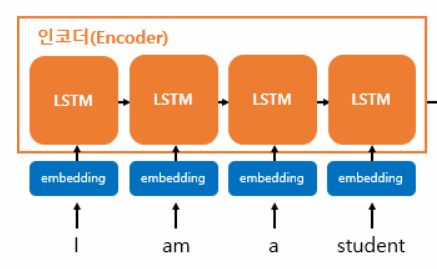

In [31]:
# 그림과 헷갈리지 않길 바랍니다  (그림은 단어단위 번역기)
# 현재 구현중인건 글자단위 번역기

* encoder는 입력 문장을 받는 여러 개의 RNN cell
* 입력은 단어 토큰화로 단어 단위로 쪼개지고, 이는 각 시점의 encoder 입력이 됌
* encoder는 모든 단어를 입력받고 마지막 시점의 은닉 상태를 decoder RNN cell의 첫번째 은닉 상태로 넘겨주며,
이를 컨텍스트 벡터(context vector)라고 함
* encoder는! **입력 시퀀스**를 → **컨텍스트 벡터**라는 고정 길이 벡터로 압축해야 함 (이 컨텍스트 벡터가 decoder) 로 넘어가게 됨




*   encoder의 구성은 일반 lstm 모델과 동일하나..
*   lstm 안의 return_state=True 로 설정하여 은닉 상태를 반환해줘야 한다! seq2seq 모델을 구성할 때 필요!



In [32]:
from keras.layers import Input, LSTM, Embedding, Dense
from keras.models import Model

In [33]:
encoder_inputs = Input(shape=(None, src_vocab_size))  # 글자사전의 크기만큼의 원핫 벡터가 입력된다
encoder_lstm = LSTM(units=256, return_state=True)  # 은닉상태 출력을 위해 return_state=True

# hidden state(은닉상태) 와 cell state(셀상태) 리턴됨 (return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(encoder_inputs)

# LSTM은 바닐라 RNN과는 달리 'state'가 두개. '은닉 상태'와 '셀 상태'.
#  => 이들을 묶어서 context vector 형성

encoder_states = [state_h, state_c]
# ↑ 이 값을 디코더에 전달하게 될거다

In [34]:
print('encoder_inputs:', encoder_inputs.shape)
print('encoder_outputs:', encoder_outputs.shape)
print('state_h:', state_h.shape)
print('state_c:', state_c.shape)

encoder_inputs: (None, None, 80)
encoder_outputs: (None, 256)
state_h: (None, 256)
state_c: (None, 256)


In [35]:
type(encoder_inputs)

keras.src.backend.common.keras_tensor.KerasTensor

## 디코더(Decoder) 구성

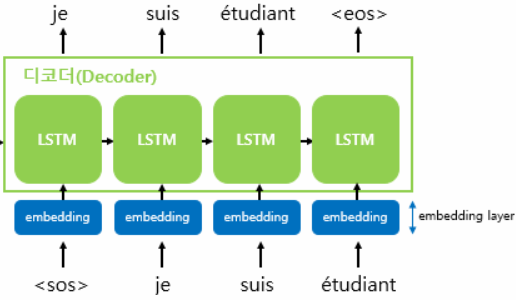

- 디코더의 처음 입력은 &lt;sos&gt; 토큰. (start of sequence)
- 이 토큰 다음에 등장할 단어 예측
- 예측한 결과를 다음 타임스텝의 디코더 입력으로 사용
- 위 과정을 반복한다.  &lt;eos&gt; 토큰이 예측될때까지!

- 결국decoder는!
  - => encoder 에서 받은 context vector 를 활용해 sequence 를 만들어 낸다


- 모델의 구성은 encoder 와 유사 하나,
- LSTM 에서 아래 설정을 해주어야 한다
  - return_state=True
  - return_sequences=True  
  - 출력을 시퀀스로 반환하기 위해 필요
- 디코더 LSTM을 사용할 때는 initial_state= 를 인코더가 넘겨준 state로 설정해야 합 (context vector)
- 마지막으로 Dense, softmax 사용하여 예측 글자에 해당하는 인덱스를 리턴하도록 구성

### 교사 강요(Teacher Forcing)
* 앞서 설명한 seq2seq 모델을 잘 살펴보면 디코더의 입력이 필요하지 않음을 알 수 있음
* 예측이 잘못됐을 경우, 잘못된 예측이 다음 시점으로 입력돼 연쇄적으로 잘못된 예측을 함
* 이를 해결하기 위해 디코더의 다음 시점의 입력으로 이전 시점의 출력이 아닌, 정답을 주어 이를 방지함
 - "이게 정답이야" 라는 식으로 개입해주는 거다

In [36]:
decoder_inputs = Input(shape=(None, tar_vocab_size)) # 글자사전의 크기만큼의 원핫 벡터가 입력된다
decoder_lstm = LSTM(256, return_sequences=True, return_state=True)  # return_sequences=True  결괄를 시퀀스 출력!

# intial_state=encoder_states
#    디코더에게 인코더의 은닉 상태, 셀 상태를 전달.  (context vector!)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)

decoder_softmax_layer = Dense(tar_vocab_size, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_outputs)


In [37]:
print('decoder_inputs:', decoder_inputs.shape)
print('decoder_outputs:', decoder_outputs.shape)
print('decoder_softmax_outputs:', decoder_softmax_outputs.shape)

decoder_inputs: (None, None, 102)
decoder_outputs: (None, None, 256)
decoder_softmax_outputs: (None, None, 102)


In [38]:
# 위 encoder, decoder layer 들을 만들었으니
#  이들을 결합해서 seq2seq 모델을 만들어보자

## Seq2Seq 모델
*   앞서 구성한 encoder와 decoder를 결합해 seq2seq model을 구성
*   구성한 모델과 준비한 데이터를 사용해 기계 번역 학습


In [39]:
from keras.models import Model

# 두개의 input 을 주고, output 을 준뒤에, compile 하면 된다.
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# 학습

In [40]:
model.fit(x=[encoder_input_oh, decoder_input_oh], y=decoder_target_oh,
          batch_size = 64, epochs=40, validation_split=0.2, )

Epoch 1/40
750/750 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.7351 - loss: 1.1220 - val_accuracy: 0.7779 - val_loss: 0.7698
Epoch 2/40
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.8258 - loss: 0.5976 - val_accuracy: 0.8056 - val_loss: 0.6618
Epoch 3/40
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.8475 - loss: 0.5164 - val_accuracy: 0.8225 - val_loss: 0.5968
Epoch 4/40
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.8617 - loss: 0.4661 - val_accuracy: 0.8336 - val_loss: 0.5573
Epoch 5/40
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.8725 - loss: 0.4285 - val_accuracy: 0.8453 - val_loss: 0.5170
Epoch 6/40
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.8809 - loss: 0.4002 - val_accuracy: 0.8529 - val_loss: 0.4913
Epoch 7/40
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.8873 - loss: 0.3786 - val_accuracy: 0.8594 - val_loss: 0.4709
Epoch 8/40
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.8924 - loss: 0.3614 - val_acc

## 모델 저장

In [41]:
base_path

'/content/drive/MyDrive/KoreaIT (코리아it)/250715 💚자연어처리S4/[자연어처리]/dataset(NLP2507)'

In [42]:
# model.save(os.path.join(base_path, 'out', 'eng2fra_ch.keras'))

## 모델 불러오기

In [43]:
# model = tf.keras.models.load_model(os.path.join(base_path, 'out', 'eng2fra_ch.keras'))

## 예측 (Seq2Seq 동작시키기)

![](https://wikidocs.net/images/page/24996/%EC%9D%B8%EC%BD%94%EB%8D%94%EB%94%94%EC%BD%94%EB%8D%94%EB%AA%A8%EB%8D%B8.PNG)

*   일반 모델과는 다르게, seq2seq 모델은 모델 예측 프로세스가 다름
*   예측할 때는 인덱스 하나씩을 예측하게 되며, 예측한 인덱스를 저장하고 이를 다시 입력으로 사용해 종료 토큰이 나올때까지 반복
*   마지막으로 예측한 인덱스들을 사전을 통해 글자들로 변환해 최종 예측을 얻음

In [44]:
# 1. 인코더 정의
encoder_model = Model(inputs=encoder_inputs, outputs=encoder_states)

In [45]:
# 2. 디코더 설계

In [46]:
# 이전 시점의 상태들을 저장하는 텐서
decoder_state_input_h = Input(shape=(256,))  # LSTM 의 units=256
decoder_state_input_c = Input(shape=(256,))

decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

print('decoder_state_input_h:', decoder_state_input_h.shape)
print('decoder_state_input_c:', decoder_state_input_c.shape)

decoder_state_input_h: (None, 256)
decoder_state_input_c: (None, 256)


In [47]:
decoder_outputs, state_h, state_c = decoder_lstm(decoder_inputs, initial_state=decoder_states_inputs)
#         훈련과정때 와는 달리  LSTM 의 리턴하는 hidden state 와 cell state 를 사용.

In [48]:
print('decoder_outputs:', decoder_outputs.shape)
print('state_h:', state_h.shape)
print('state_c:', state_c.shape)

decoder_outputs: (None, None, 256)
state_h: (None, 256)
state_c: (None, 256)


In [49]:
decoder_states = [state_h, state_c]
decoder_softmax_outputs = decoder_softmax_layer(decoder_outputs)

decoder_model = Model(inputs=[decoder_inputs] + decoder_states_inputs,
      outputs=[decoder_softmax_outputs] + decoder_states)


In [50]:
decoder_softmax_outputs.shape

(None, None, 102)

In [51]:
from numpy._core.defchararray import index
# 인덱스로부터 단어를 얻을수 있는 index_to_src 와 index_to_tar 을 만들기
index_to_src = dict((i, char) for char, i in src_to_index.items())
index_to_tar = dict((i, char) for char, i in tar_to_index.items())

In [52]:
# 입력 시퀀스 -> 출력 시퀀스 리턴
def decode_sequence(input_seq):
  # 입력으로부터 인코더의 상태를 얻음.
  states_value = encoder_model.predict(input_seq)

  # 디코더의 입력
  # <SOS> 에 해당하는 원-핫 벡터 생성
  target_seq = np.zeros((1, 1, tar_vocab_size))
  target_seq[0, 0, tar_to_index['\t']] = 1


  decoded_sentence = "" # decoder 의 출력 문자열들(예측 문장)을 담을거다. 최종리턴값.
  stop_condition = False
  while not stop_condition:
    # 이전 시점의 상태 states_value 를 현 시점의 초기 상태로 사용
    ouput_tokens, h, c = decoder_model.predict([target_seq] + states_value)

    # 예측 결과를 문자로 변환
    sampled_token_index = np.argmax(ouput_tokens[0, -1, :])
    sampled_char = index_to_tar[sampled_token_index]

    # 현재 시점의 예측 문자를 예측 문장에 추가
    decoded_sentence += sampled_char

    # <eos> 에 도달했거나 최대길이에 넘으면 중단.
    if(sampled_char == '\n' or
      len(decoded_sentence) > max_tar_len):
      stop_condition = True

    # 현재 시점의 예측 결과를 다음 시점의 입력으로 사용하기 위해 원핫인코딩 저장
    target_seq = np.zeros((1, 1, tar_vocab_size))
    target_seq[0, 0, sampled_token_index] = 1

    # 현재 시점의 상태를 다음 시점의 상태로 사용하기 위해 저장
    states_value = [h, c]

  return decoded_sentence



In [53]:
df.src[3]

'Go.'

In [54]:
df.src[100]

'Got it!'

In [55]:
# 예측에 입력할 문장 샘플들의 인덱스들
input_idx = [3, 50, 100, 300, 1001]

In [56]:
for idx in input_idx:
  print(df.src[idx])

Go.
Hello!
Got it!
Go home.
Forget me.


In [57]:
for seq_index in input_idx:
  input_seq = encoder_input_oh[seq_index: seq_index+1]
  decoded_sentence = decode_sequence(input_seq)

  print("🟨" * 35)
  print('입력 문장:', df.src[seq_index])
  print('정답 문장:', df.tar[seq_index][2:len(df.tar[seq_index])-1])  # '\t ' (두글자) 와 뒤의 '\n' (한글자) 빼고 출력
  print('번역 문장:', decoded_sentence[:len(decoded_sentence)-1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨
입력 문장: Go.
정답 문장: Bouge ! 
번역 문장:  Contre ! 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨
입력 문장: 